In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/blood_transfusion.csv'
df = pd.read_csv(url)
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


<AxesSubplot:>

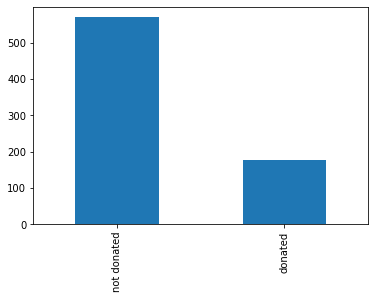

In [5]:
df.Class.value_counts().plot(kind='bar')

In [6]:
X = df.drop(columns=['Class'])
y = df.Class

In [7]:
yEnc = LabelEncoder()
y = yEnc.fit_transform(y)

In [8]:
estimator = make_pipeline(StandardScaler(),DecisionTreeClassifier())

In [9]:
estimator.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__random_state': None,
 'decisiontreeclassifier__splitter': 'best'}

In [10]:
params = {
    'decisiontreeclassifier__criterion':['gini','entropy','log_loss'],
    'decisiontreeclassifier__splitter': ['best','random'],
    'decisiontreeclassifier__max_depth':[1,2,3,4,5,10,15,20,25,30],
    'decisiontreeclassifier__min_samples_split':[2,3,4,5]
}

In [11]:
grid = GridSearchCV(estimator, params, cv=3, n_jobs=-1, verbose=3)
grid.fit(X,y)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5,
                                                               10, 15, 20, 25,
                                                               30],
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5],
                         'decisiontreeclassifier__splitter': ['best',
                                                              'random']},
             verbose=3)

In [12]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_split=4,
                                        splitter='random'))])

In [13]:
out = pd.DataFrame(grid.cv_results_)

In [14]:
out.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__min_samples_split,param_decisiontreeclassifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
109,0.017097,0.018122,0.001904,0.002692,entropy,4,4,random,{'decisiontreeclassifier__criterion': 'entropy...,0.820,0.767068,0.763052,0.783373,0.025951,1
117,0.014799,0.010951,0.020286,0.022294,entropy,5,4,random,{'decisiontreeclassifier__criterion': 'entropy...,0.808,0.767068,0.771084,0.782051,0.018422,2
179,0.010870,0.003897,0.002538,0.001808,log_loss,3,3,random,{'decisiontreeclassifier__criterion': 'log_los...,0.768,0.763052,0.783133,0.771395,0.008542,3
105,0.005816,0.004230,0.005490,0.003885,entropy,4,2,random,{'decisiontreeclassifier__criterion': 'entropy...,0.768,0.763052,0.771084,0.767379,0.003308,4
103,0.024051,0.007300,0.002070,0.002583,entropy,3,5,random,{'decisiontreeclassifier__criterion': 'entropy...,0.768,0.763052,0.767068,0.766040,0.002147,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.010135,0.001998,0.009654,0.001942,gini,30,3,best,"{'decisiontreeclassifier__criterion': 'gini', ...",0.560,0.698795,0.694779,0.651191,0.064503,236
139,0.020977,0.015474,0.003280,0.000914,entropy,20,3,random,{'decisiontreeclassifier__criterion': 'entropy...,0.524,0.734940,0.690763,0.649901,0.090834,237
77,0.023525,0.010201,0.002838,0.001322,gini,30,4,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.552,0.706827,0.690763,0.649863,0.069510,238
235,0.013358,0.009093,0.009441,0.008121,log_loss,30,3,random,{'decisiontreeclassifier__criterion': 'log_los...,0.548,0.706827,0.690763,0.648530,0.071387,239


In [15]:
model = grid.best_estimator_

In [16]:
ypred = model.predict(X)
print(confusion_matrix(y, ypred))

[[ 74 104]
 [ 46 524]]


In [17]:
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50       178
           1       0.83      0.92      0.87       570

    accuracy                           0.80       748
   macro avg       0.73      0.67      0.69       748
weighted avg       0.78      0.80      0.78       748



In [18]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     

In [19]:
import plotly.express as px

px.scatter_3d(df, x='Recency', y='Frequency', z='Monetary', color='Class')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Class=donated<br>Recency=%{x}<br>Frequency=%{y}<br>Monetary=%{z}<extra></extra>',
              'legendgroup': 'donated',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'donated',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([ 2,  0,  1,  2,  2,  2,  5,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4,
                           4,  4,  4,  4,  2,  2,  4,  2,  4,  2,  2,  4,  4,  2,  4,  4,  4,  2,
                           2,  4,  2,  2,  4,  2,  2,  2,  4,  2,  2,  4,  4,  4,  5,  4,  2,  4,
                           4,  2,  2,  2,  4,  2,  2,  4,  4,  2,  4,  4,  2,  2,  2,  2,  2,  2,
                          11,  4,  4,  4,  4,  2,  9,  6,  4,  4,  4,  4,  4,  4,  8,  4, 11, 11,
                          11, 11,  2,  4, 14,  9, 14, 14, 14, 11, 11,  9, 14, 14, 16, 11, 16, 11,
                          14, 16,  4, 11, 21, 21, 16, 21, 22, 26,  2,  6,  2,  0,  2,  3,  2,  2,
                           4,  4,  3,  4,  3,  4,  2,  2,  4,  1,  2,  2,  4,  2,  4,  2,  2,  2,
                           2,  2,  4,  4,  4,  2,  4,  2,  4,  4,  4,  4,  2,  2,  4,  3,  2,  2,
                           9,  3,  4,  4,  4, 13,  7, 11, 14, 11,  2, 20, 17, 11, 14, 23],
                         dtype=int64),
              'y': array([50, 13, 16, 20,  7,  9, 46, 10,  6,  5, 14, 15,  6,  3,  3,  6,  6, 12,
                           5, 10, 10,  9,  8, 12,  6, 14,  7, 13,  5, 20,  9, 11,  5, 19,  8,  7,
                           8,  5,  3,  4, 17,  2,  2,  4,  6,  6,  7,  2,  9,  4,  7,  8, 13,  5,
                           8,  7, 11,  3,  5,  6,  5,  8,  8,  2,  2,  3,  2,  7,  1,  1,  1,  1,
                           4,  5,  6,  4,  5,  5,  8,  2,  1,  1,  1,  1,  1,  1,  8,  3, 17,  8,
                           3, 14,  3,  4,  4,  2,  5,  3,  4,  5,  9,  5,  8,  4,  6,  7,  3,  1,
                           2,  5,  2,  3,  2,  3,  7,  1,  1,  5, 43, 22, 34, 26, 41, 21, 21, 13,
                           4, 16,  5, 33, 10, 10, 11, 11, 13, 10,  5,  6,  5,  4,  5,  7,  6,  8,
                           2,  6, 16,  2,  2, 12,  7,  6,  6, 11, 16,  6,  2,  2,  6,  4,  1,  1,
                          11,  1,  1,  1,  4,  3,  9,  8,  2,  1,  3, 14,  7,  2,  2,  1],
                         dtype=int64),
              'z': array([12500,  3250,  4000,  5000,  1750,  2250, 11500,  2500,  1500,  1250,
                           3500,  3750,  1500,   750,   750,  1500,  1500,  3000,  1250,  2500,
                           2500,  2250,  2000,  3000,  1500,  3500,  1750,  3250,  1250,  5000,
                           2250,  2750,  1250,  4750,  2000,  1750,  2000,  1250,   750,  1000,
                           4250,   500,   500,  1000,  1500,  1500,  1750,   500,  2250,  1000,
                           1750,  2000,  3250,  1250,  2000,  1750,  2750,   750,  1250,  1500,
                           1250,  2000,  2000,   500,   500,   750,   500,  1750,   250,   250,
                            250,   250,  1000,  1250,  1500,  1000,  1250,  1250,  2000,   500,
                            250,   250,   250,   250,   250,   250,  2000,   750,  4250,  2000,
                            750,  3500,   750,  1000,  1000,   500,  1250,   750,  1000,  1250,
                           2250,  1250,  2000,  1000,  1500,  1750,   750,   250,   500,  1250,
                            500,   750,   500,   750,  1750,   250,   250,  1250, 10750,  5500,
                           8500,  6500, 10250,  5250,  5250,  3250,  1000,  4000,  1250,  8250,
                           2500,  2500,  2750,  2750,  3250,  2500,  1250,  1500,  1250,  1000,
                           1250,  1750,  1500,  2000,   500,  1500,  4000,   500,   500,  3000,
                           1750,  1500,  1500,  2750,  4000,  1500,   500,   500,  1500,  1000,
                            250,   250,  275